# Support vector Regression (SRV)

![SRV image](https://miro.medium.com/v2/resize:fit:1115/1*bKI_PWOfdo9tTlMoGJIq_g.png)


### Importing the dataset

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

dataset = pd.read_csv("./reg_dataset/Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [26]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Applying feature Scaling on the dataset
- There is no need to apply feature scaling on a Linear regression model, The coefficent for predictors compensate for any extream/irregular Dependent variables.
- But in a Non-liner model Such as SRV, one has to apply feature scalling.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Note. feature scallng should be applied after spliting the dataset.
# here the dataset is to small for splitting

st_x = StandardScaler()
st_y = StandardScaler()

X = st_x.fit_transform(X)
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [28]:
Y = np.reshape(Y,(len(Y),1))
Y = st_y.fit_transform(Y)
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training the dataset with SVR
- <a href='https://data-flair.training/blogs/svm-kernel-functions/'>Reference for kernals in SVR</a>

In [29]:
from  sklearn.svm import SVR

regressor = SVR(kernel='rbf') # Using Radial basis function
regressor.fit(X,Y)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### predicting the salary for level 6.5

In [30]:
# we have to transform 6.5 as per Standartization
var_x = st_x.transform([[6.5]])
result = regressor.predict(var_x).reshape(-1,1)

# the model returns scaled value. in needs to be inverted back using dependent variable.
result = st_y.inverse_transform(result)
print(f'{result}  for  6.5')

[[170370.0204065]]  for  6.5


### Visualizing the dataset.

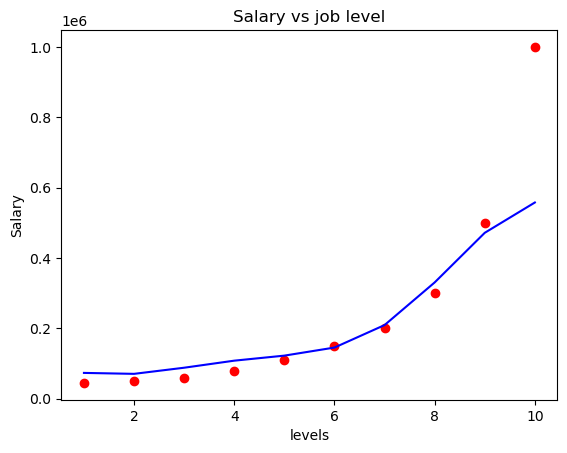

In [31]:
plt.title("Salary vs job level")

x = st_x.inverse_transform(X)
y = st_y.inverse_transform(Y)
plt.scatter(x,y, color='red')
plt.xlabel('levels')
plt.ylabel('Salary')

result = regressor.predict(X).reshape(-1,1)
result = st_y.inverse_transform(result)
plt.plot(x,result, color = 'blue')

plt.show()

### visualizing with soother curve

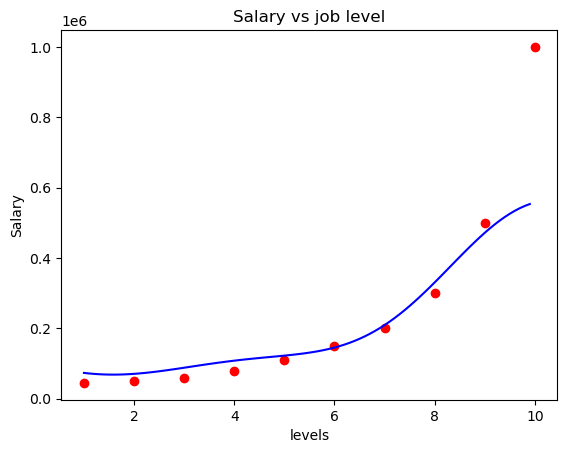

In [32]:
plt.title("Salary vs job level")

x = st_x.inverse_transform(X)

x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape(len(x_grid),1)

y = st_y.inverse_transform(Y)
plt.scatter(x,y, color='red')
plt.xlabel('levels')
plt.ylabel('Salary')

x_grid_st = st_x.transform(x_grid)
result = regressor.predict(x_grid_st).reshape(-1,1)
result = st_y.inverse_transform(result)

plt.plot(x_grid,result, color = 'blue')

plt.show()